<a href="https://colab.research.google.com/github/BrunoDkno368/ETL-EDA-TITANIC/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRERIAS

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# ETL

## EXTRAT (E)

In [58]:
df = pd.read_csv('/content/drive/MyDrive/ETL practica/Titanic/Titanic-Dataset.csv')

In [59]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
711,712,0,1,"Klaber, Mr. Herman",male,NaN,0,0,113028,26.5500,C124,S
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
288,289,1,2,"Hosono, Mr. Masabumi",male,42.0,0,0,237798,13.0000,NaN,S


## TRANSFORM (T)

verificamos cantidad de filas y de columnas

In [60]:
print('el dataset tiene :', df.shape[1],'columnas')

el dataset tiene : 12 columnas


In [61]:
print('el dataset tiene :', df.shape[0],'filas')

el dataset tiene : 891 filas


Renombrar columnas

In [62]:
#df_nuevo = df.rename(columns={'Nombre_Antiguo': 'Nombre_Nuevo'})
df = df.rename(columns= {'PassengerId':'Id de pasajero','Survived':'Sobrevivio','Pclass':'Clase', 'Name':'Nombre completo', 'Sex':'Sexo',
                'Age':'Edad','SibSp':'Hermanos/Conyuges','Parch':'Padre/Hijo',
                'Fare':'Tarifa del pasajero', 'Cabin':'Cabina','Embarked':'Lugar de enbarque'})

In [63]:
print(df.columns)

Index(['Id de pasajero', 'Sobrevivio', 'Clase', 'Nombre completo', 'Sexo',
       'Edad', 'Hermanos/Conyuges', 'Padre/Hijo', 'Ticket',
       'Tarifa del pasajero', 'Cabina', 'Lugar de enbarque'],
      dtype='object')


Renombrar siglas por nombres completos en lugar de enbarque

In [64]:
df['Lugar de enbarque'] = df['Lugar de enbarque'].replace({'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})
df['Lugar de enbarque'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

Renombramos 0 y 1 por si sobrevivio o no

In [65]:
df['Sobrevivio'] = df['Sobrevivio'].rename({'0':'No','1':'Si'})

Renombramos la clase del pasajero 1,2,3

In [66]:
df['Clase'] = df['Clase'].rename({'1':'Primera','2':'Segunda','3':'Tercera'})

verificamos los typos de datos de las columnas y si corresponde con los datos ingresados

In [67]:
print(df.dtypes)

Id de pasajero           int64
Sobrevivio               int64
Clase                    int64
Nombre completo         object
Sexo                    object
Edad                   float64
Hermanos/Conyuges        int64
Padre/Hijo               int64
Ticket                  object
Tarifa del pasajero    float64
Cabina                  object
Lugar de enbarque       object
dtype: object


Verificar duplicados

In [68]:
df.duplicated().sum()

np.int64(0)

Verificar nulos

In [69]:
df.isna().sum()

,0
Id de pasajero,0
Sobrevivio,0
Clase,0
Nombre completo,0
Sexo,0
Edad,177
Hermanos/Conyuges,0
Padre/Hijo,0
Ticket,0
Tarifa del pasajero,0


In [70]:
df['Edad']= df['Edad'].fillna(df['Edad'].mean())

In [71]:
df['Edad'].isna().sum()

np.int64(0)

In [72]:
df['Cabina']= df['Cabina'].fillna('Sin datos')

In [73]:
df['Cabina'].isna().sum()

np.int64(0)

In [74]:
df['Lugar de enbarque'] = df['Lugar de enbarque'].fillna('Sin datos')

In [75]:
df['Lugar de enbarque'].isna().sum()

np.int64(0)

Crear nuevas columnas

In [76]:
def grupo_edad (edad):
  if edad < 12: return 'Niño'
  elif edad < 18: return 'Adolescente'
  elif edad < 65: return 'Adulto'
  else : return 'Anciano'

In [77]:
df['Grupo de edad'] = df['Edad'].apply(grupo_edad)

In [78]:
df.sample(5)

,Id de pasajero,Sobrevivio,Clase,Nombre completo,Sexo,Edad,Hermanos/Conyuges,Padre/Hijo,Ticket,Tarifa del pasajero,Cabina,Lugar de enbarque,Grupo de edad
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.000000,0,0,16966,134.5000,E40,Cherbourg,Adulto
109,110,1,3,"Moran, Miss. Bertha",female,29.699118,1,0,371110,24.1500,Sin datos,Queenstown,Adulto
348,349,1,3,"Coutts, Master. William Loch ""William""",male,3.000000,1,1,C.A. 37671,15.9000,Sin datos,Southampton,Niño
253,254,0,3,"Lobb, Mr. William Arthur",male,30.000000,1,0,A/5. 3336,16.1000,Sin datos,Southampton,Adulto
420,421,0,3,"Gheorgheff, Mr. Stanio",male,29.699118,0,0,349254,7.8958,Sin datos,Cherbourg,Adulto


In [79]:
df['Familia total'] = df['Hermanos/Conyuges'] + df['Padre/Hijo']
df['Familia total'].sample(5)

,Familia total
72,0
890,0
431,1
804,0
148,2


#LOAD (L)

In [80]:
df.to_csv('Titanic_ETL.csv', index=False)

#EDA

otliers

<Axes: xlabel='Edad'>

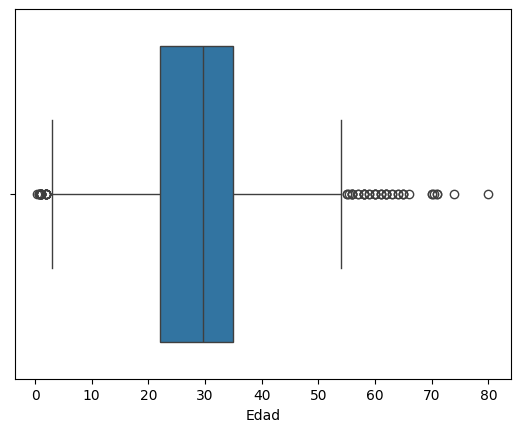

In [81]:
sns.boxplot(x=df["Edad"])

<Axes: xlabel='Tarifa del pasajero'>

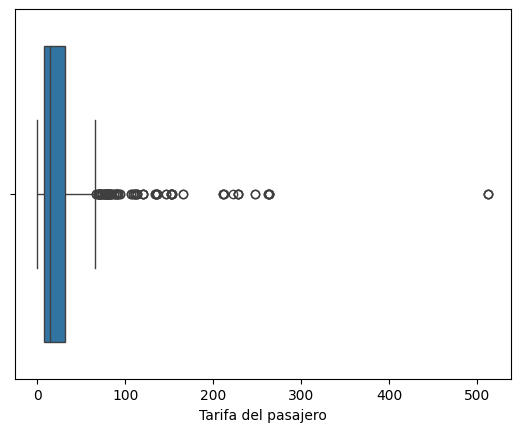

In [82]:
sns.boxplot(x=df["Tarifa del pasajero"])

supervivencia por sexp

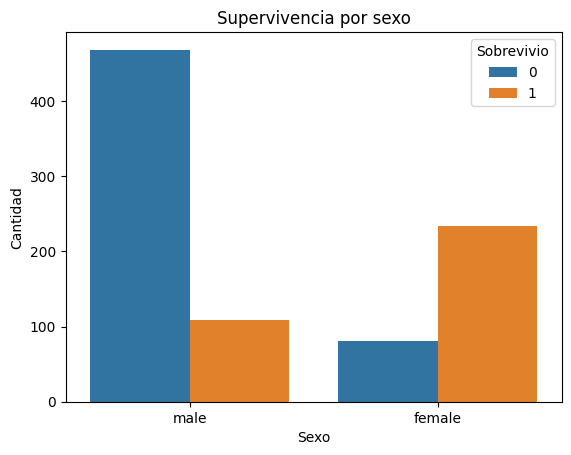

In [83]:
sns.countplot(x='Sexo', hue='Sobrevivio', data=df)
plt.title('Supervivencia por sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.show()

Supervivencia por clase

cantidad de personas por clases

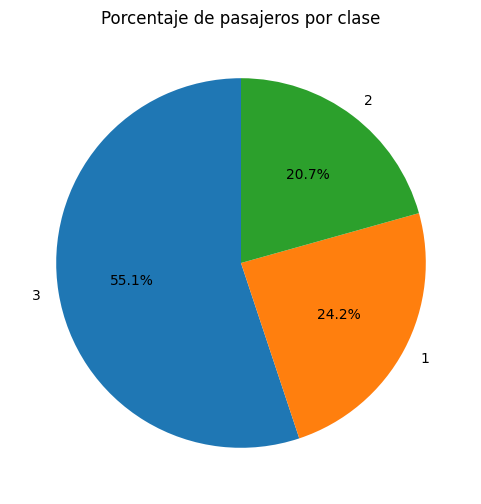

In [84]:
clase_counts = df['Clase'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(clase_counts, labels=clase_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Porcentaje de pasajeros por clase")
plt.show()

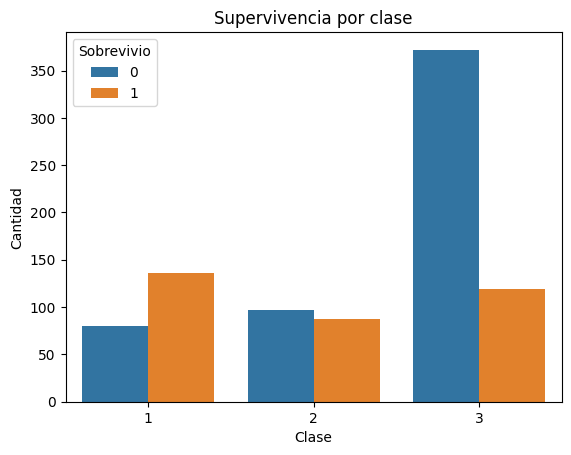

In [85]:
sns.countplot(data=df, x='Clase', hue='Sobrevivio')
plt.title('Supervivencia por clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

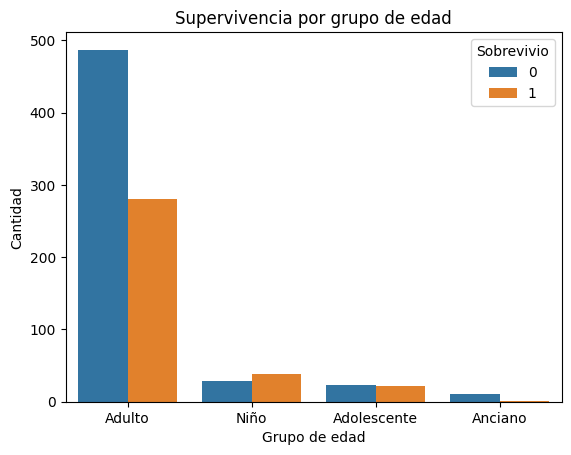

In [86]:
sns.countplot(data=df, x='Grupo de edad', hue='Sobrevivio')
plt.title('Supervivencia por grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Cantidad')
plt.show()

por sexo, clase y si sobrevivio (Triple analisis)

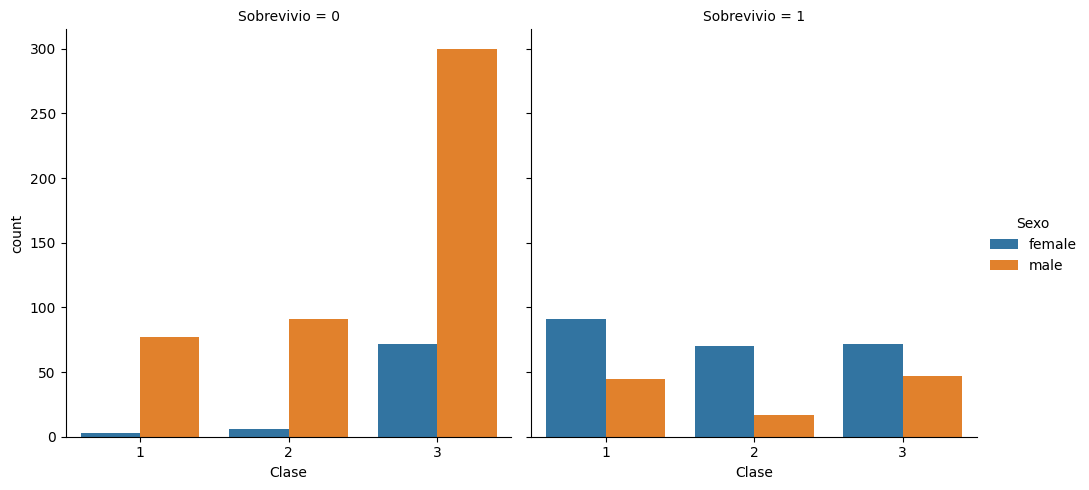

In [87]:
sns.catplot(data=df, x="Clase", hue="Sexo", col="Sobrevivio", kind="count")